In [1]:
import pandas
import geopandas
from geopandas.tools import sjoin
from shapely.geometry import Point
import pylab as pl
#import code; code.interact(local=locals())

print("hi five!")

hi five!


In [17]:
#-----------------------------
# loading data as dataframes
#-----------------------------
suspects_df = pandas.read_csv('evidence/suspects_footprints.csv',sep=',')
victim_df = pandas.read_csv('evidence/victims_footprints.csv',sep=',')
print("data loaded")

data loaded


In [3]:
#-----------------------------
# having fun with data
#-----------------------------
# columns available on dataset
columns		=	suspects_df.columns
print("dataset columns: ",columns)

dataset columns:  Index(['id', 'name', 'latitud', 'longitud'], dtype='object')


In [13]:
# head of dataset
header 		=	suspects_df.head(10)
print("dataset header: ",header)

dataset header:     id    name    latitud   longitud
0   1  martha  19.429522 -99.163396
1   2  Martha  19.427084 -99.167527
2   3  Martha  19.424635 -99.171057
3   4  Martha  19.423593 -99.208554
4   5  Martha  19.431212 -99.157806
5   6  Martha  19.427165 -99.149856
6   7  Martha  19.426801 -99.139674
7   8  Martha  19.426801 -99.139674
8   9  Martha  19.373200 -99.155909
9  10    Beth  19.353470 -99.175356


In [47]:
# dtypes
dtypes 		=	suspects_df.dtypes
print("dataset dtypes: ",dtypes)

dataset dtypes:  id            int64
name         object
latitud     float64
longitud    float64
geometry     object
dtype: object


In [14]:
#unique elements
print("suspects: ",suspects_df['name'].unique())
print("have fun: done!")

suspects:  ['martha' 'Martha' 'Beth' 'John' 'Jacob']
have fun: done!


In [33]:
#-----------------------------
# loading data as geodataframes
#-----------------------------
crs 				=	{'init': 'epsg:4326'}

#suspects
geometry 			=	[Point(xy) for xy in zip(suspects_df.longitud, suspects_df.latitud)]
suspects_gdf		=	geopandas.GeoDataFrame(suspects_df, crs=crs, geometry=geometry)

#victim
geometry 			=	[Point(xy) for xy in zip(victim_df.longitud, victim_df.latitud)]
victim_gdf			=	geopandas.GeoDataFrame(victim_df, crs=crs, geometry=geometry)

#-----------------------------
# manipulating data
#-----------------------------

#slicing usung conditions
beth 				=	suspects_gdf[suspects_gdf['name']=='Beth']
john 				=	suspects_gdf[suspects_gdf['name']=='John']
jacob 				=	suspects_gdf[suspects_gdf['name']=='Jacob']
lorraine 			= 	victim_gdf[victim_gdf['name']=='Lorraine']
martha 				=	suspects_gdf[(suspects_gdf['name']=='Martha')|(suspects_gdf['name']=='martha')]
#manipulation row values
suspects_gdf['name']=	suspects_gdf['name'].str.title()#st.lower()#str.upper()

martha 				=	suspects_gdf[suspects_gdf['name']=='Martha']
print("suspects: ",suspects_df['name'].unique())

suspects:  ['martha' 'Martha' 'Beth' 'John' 'Jacob']


In [34]:
#check
#-----------------------------
# visualizing
#-----------------------------
#visualizing using CartoDB
suspects_gdf.to_file('results/suspects_footprints/suspects_footprints.shp')
victim_gdf.to_file('results/victims_footprints/victims_footprints.shp')

In [41]:
#-----------------------------
# spatial JOINS 
#-----------------------------
#load settlements
polygons 			=		geopandas.GeoDataFrame.from_file('settlements/settlements_CDMX.shp')
points_in_polys 	= 		sjoin(suspects_gdf, polygons, how='left')

#new geodataframe inspection
points_in_polys.columns

Index(['id', 'name', 'latitud', 'longitud', 'geometry', 'index_right',
       'CVE_ENT', 'CVE_MUN', 'NOM_MUN', 'Name', 'd_cp'],
      dtype='object')

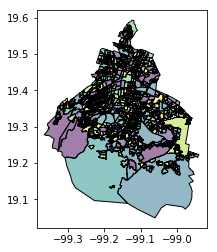

In [46]:
polygons.plot()
pl.show()